<a href="https://colab.research.google.com/github/sushma5580/project/blob/main/Solar_radiation_prediction_model_(ML_Project)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import datasist as ds
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df= pd.read_csv('SolarPrediction.csv')
df

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00


In [ ]:
df.isnull().sum()

UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [ ]:
df.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


<ipython-input-6-2c94a6e18c72>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['UNIXTime'])


<Axes: xlabel='UNIXTime', ylabel='Density'>

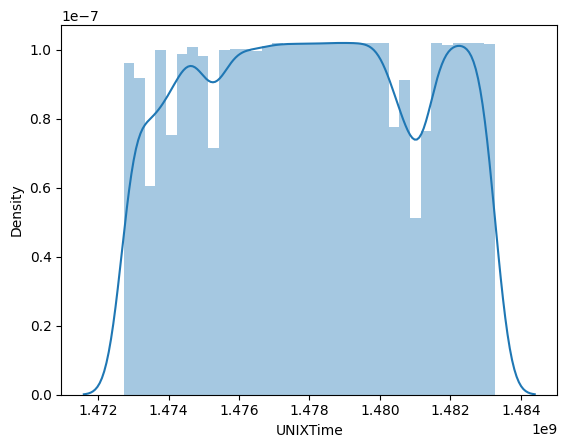

In [ ]:
sns.distplot(df['UNIXTime'])

In [ ]:
df=df.drop(['Data','Time','TimeSunRise','TimeSunSet'],axis=1)
df

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
0,1475229326,1.21,48,30.46,59,177.39,5.62
1,1475229023,1.21,48,30.46,58,176.78,3.37
2,1475228726,1.23,48,30.46,57,158.75,3.37
3,1475228421,1.21,48,30.46,60,137.71,3.37
4,1475228124,1.17,48,30.46,62,104.95,5.62
...,...,...,...,...,...,...,...
32681,1480587604,1.22,44,30.43,102,145.42,6.75
32682,1480587301,1.17,44,30.42,102,117.78,6.75
32683,1480587001,1.20,44,30.42,102,145.19,9.00
32684,1480586702,1.23,44,30.42,101,164.19,7.87


<Axes: >

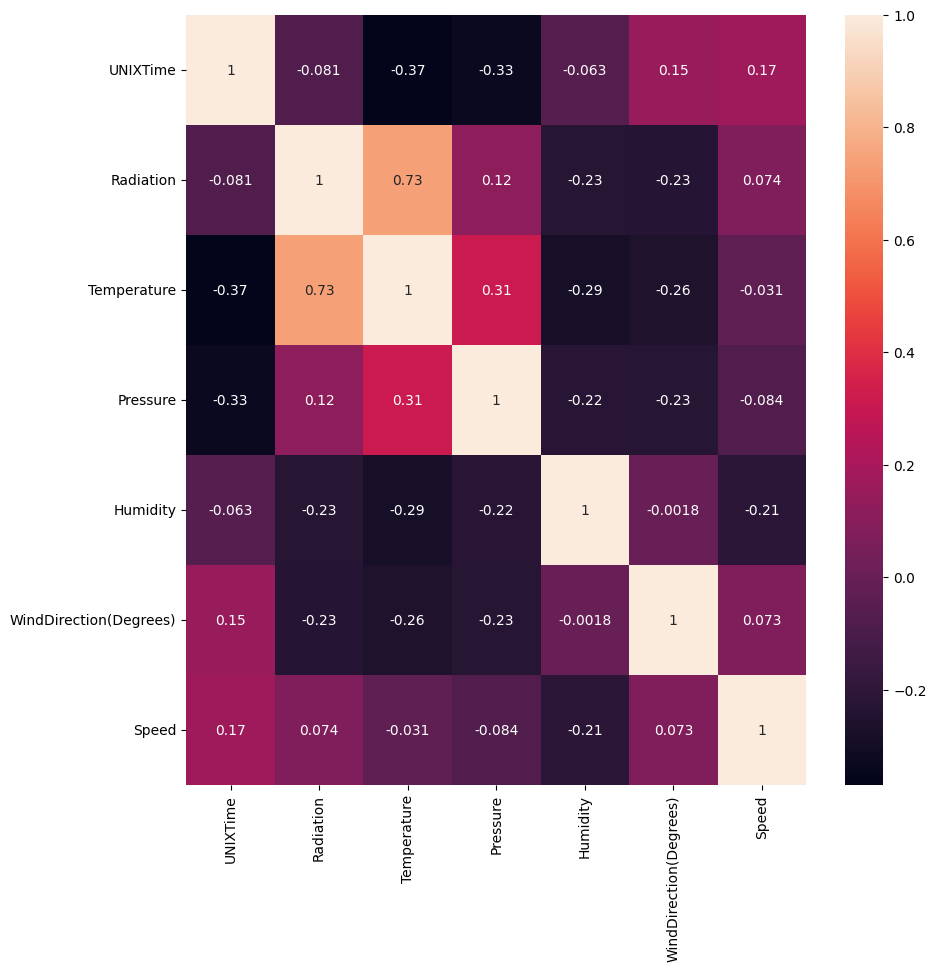

In [ ]:
figure= plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.columns

Index(['UNIXTime', 'Radiation', 'Temperature', 'Pressure', 'Humidity',
       'WindDirection(Degrees)', 'Speed'],
      dtype='object')

In [ ]:
x = df[['UNIXTime','Temperature','Pressure','Humidity','WindDirection(Degrees)','Speed']]
y = df['Radiation']

# setting up testing and training sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
Model = RandomForestRegressor()
Model.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
Model.predict([[1475229326,48,30.46,59,177.39,5.62]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1.894])

In [ ]:
# pickle--> to save the model to one file
import pickle as pk
filename="s_model.sav"
pk.dump(Model,open(filename,"wb"))#to dump the model into the file

In [ ]:
Model

RandomForestRegressor()

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 80.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 kB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 60.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.7 MB/

In [ ]:
import gradio as gr
def predict(UnixTime,Temperature,Pressure,Humidity,WindDirection,Speed):
    features=[UnixTime,Temperature,Pressure,Humidity,WindDirection,Speed]
    if len(features) != 6:
        return "Input must contain 7 values."
    x = np.array(features).reshape(1, -1)  # Reshape to have 1 row and 7 columns
    res = Model.predict(x)
    return res[0]

# Create a Gradio interface with 6 input fields
app = gr.Interface(
    fn=predict,
    inputs=[
#         gr.inputs.Slider(0,20000,label="UnixTime"),
        gr.Number(label="UnixTime"),
        gr.Number(label="Temperature (in degrees Celsius)"),
        gr.Number(label="Pressure"),
        gr.Number(label="Humidity"),
        gr.Number(label="WindDirection(Degrees)"),
        gr.Number(label="Speed"),
    ],
    outputs=gr.Textbox(label="Radiation"),
    title="Ice Cream Sales Prediction",
    description="Enter the inputs to predict ice cream sales.",
)

# Launch the Gradio app
app.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://f9fb314435a6174e1e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
1475229326	1.21	48	30.46	59	177.39	5.62